<a href="https://colab.research.google.com/github/dubba1212/AIML/blob/master/Assignment_27_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Make predictions on test data and calculate the precision, recall and f1-score.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [6]:
df.drop(['CASENUM'],axis=1,inplace=True)

In [7]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
df.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [8]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.6965174129353234

In [14]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[120,  80],
       [ 42, 160]])

In [15]:
True_Negatives=conf[0][0]
False_Positives=conf[0][1]
False_Negatives=conf[1][0]
True_Positives=conf[1][1]

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred)

0.6666666666666666

In [17]:
Recall = True_Positives/(True_Positives+False_Negatives)
Recall

0.7920792079207921

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred)

0.7239819004524886

###Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.

In [19]:
df.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

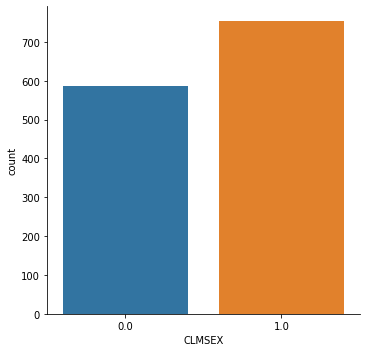

In [20]:
sns.catplot("CLMSEX",data=df,kind='count')


##we can observe from the graph that the 1.0(female) category has more count/frequency
####Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants


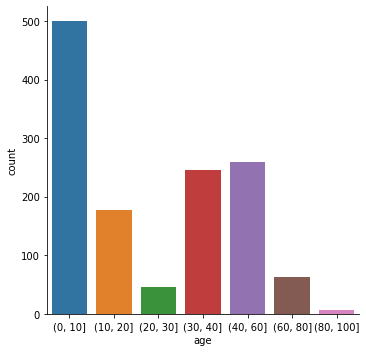

In [21]:
df['age']=pd.cut(df['CLMAGE'], bins=[0,10,20,30,40,60,80,100])
sns.catplot("age",data=df,kind='count')


##0-10 age group has more claimants

####Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., out of male claimants how many will hire an attorney; out of female how many will hire an attorney

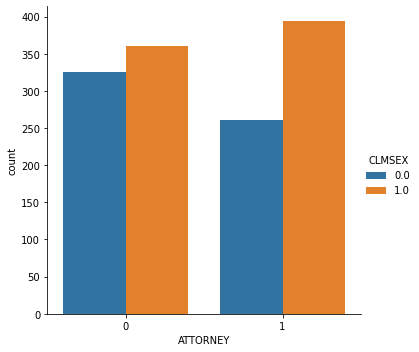

In [22]:
sns.catplot('ATTORNEY',data=df,kind='count',hue='CLMSEX')


In males, about 325 people dont opt for an attorney and also for female, 360 people dont opt for attorney

alse about 250 males and 390 females opt for attorney

Check the correlation of the dataset and visualize it through heatmap

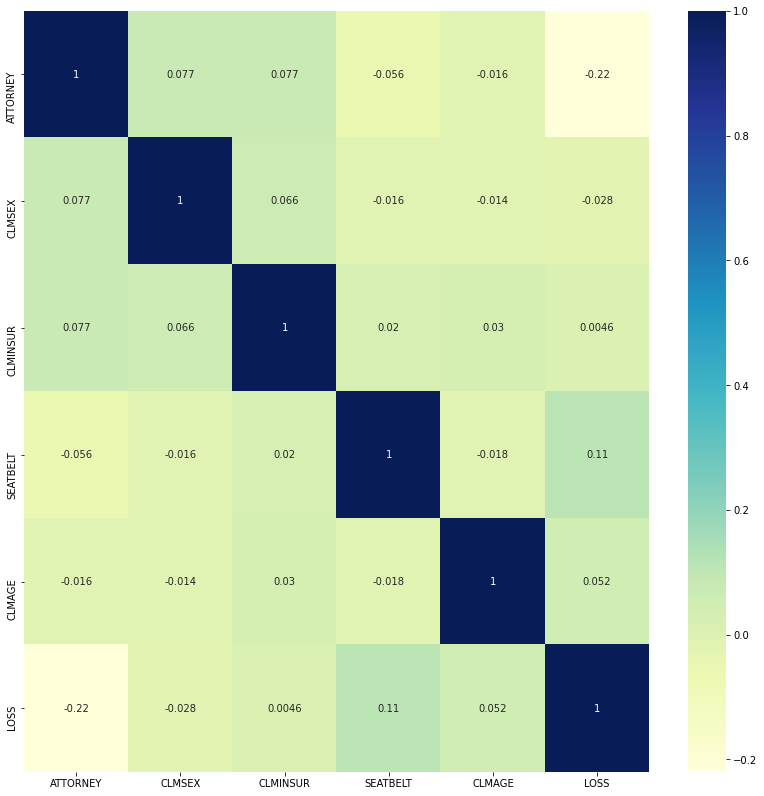

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

###Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney

In [24]:
df['SEATBELT'].value_counts()

0.0    1318
1.0      22
Name: SEATBELT, dtype: int64

###as we can see about 1318 people didnt wear seatbelt

In [25]:
df.loc[(df['SEATBELT']<1) & (df['ATTORNEY']>0)].shape[0]

649

In [26]:
(df.loc[(df['SEATBELT']<1) & (df['ATTORNEY']>0)].shape[0])/df['SEATBELT'].value_counts()[0]

0.49241274658573597

###49 percent of the people who didnt put on their seat belt hired a lawyer¶

 

